In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast
import random
from collections import Counter

In [2]:
games=pd.read_csv("../data/games.csv")
games

,publisher,genres,app_name,release_date,tags,price,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Free To Play,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Free to Play,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,"['Action', 'Adventure', 'Casual']",0.99,767400.0,彼岸领域
4,NaN,NaN,Log Challenge,NaN,"['Action', 'Indie', 'Casual', 'Sports']",2.99,773570.0,NaN
...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.99,773640.0,"Nikita ""Ghost_RUS"""
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,"['Strategy', 'Indie', 'Casual']",4.99,733530.0,Sacada
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,"['Indie', 'Simulation', 'Racing']",1.99,610660.0,Laush Dmitriy Sergeevich
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",4.99,658870.0,"xropi,stev3ns"


In [3]:
# Función para visualizar la calidad de nuestros datos

def resumen_tipos_de_datos(df):
    
    resumen = []

    for col in df.columns:

        tipos_presentes = df[col].apply(lambda x: type(x).__name__).unique()
        cantidad_nulos = df[col].isnull().sum()
        resumen.append({
            'Columna': col,
            'Tipos de Dato': tipos_presentes.tolist(),
            'Cantidad de Nulos': cantidad_nulos
        })   
    return pd.DataFrame(resumen)

In [4]:
def clean_list(lst):
    if isinstance(lst, list):
        return [element.strip() for element in lst]
    return lst

In [5]:
resumen_tipos_de_datos(games)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,genres,"[str, float]",3283
2,app_name,"[str, float]",2
3,release_date,"[str, float]",2067
4,tags,"[str, float]",163
5,price,"[str, float]",1377
6,id,[float],2
7,developer,"[str, float]",3299


In [6]:
# Convertir cada cadena que representa una lista en la columna 'genres' y 'tags' a una lista real de Python
games['genres'] = games['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
games['tags'] = games['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [7]:
# Definimos la lista de géneros válidos
allowed_genres = ['Action', 'Adventure', 'Racing', 'Simulation', 'Strategy', 'RPG', 'Sports', 'Shooter', 'Open World', 'Horror', 'Puzzle','Indie','Education','Casual']

def classify_genre(row):
    # Combinamos las listas de 'genres' y 'tags', priorizando 'genres'
    for genre_list in [row['genres'], row['tags']]:
        if genre_list is not np.nan:  # Aseguramos que la lista no sea nula
            for genre in genre_list:
                if genre in allowed_genres:
                    return genre  # Retorna el primer género válido encontrado
    return "Pendiente de clasificación"  # Si no se encuentra ningún género válido

# Aplicamos la función a cada fila del DataFrame
games['clasificacion'] = games.apply(classify_genre, axis=1)

In [8]:
games.head()

,publisher,genres,app_name,release_date,tags,price,id,developer,clasificacion
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.99,761140.0,Kotoshiro,Action
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",Free To Play,643980.0,Secret Level SRL,Indie
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",Free to Play,670290.0,Poolians.com,Casual
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.99,767400.0,彼岸领域,Action
4,NaN,NaN,Log Challenge,NaN,"[Action, Indie, Casual, Sports]",2.99,773570.0,NaN,Action


In [9]:
games['clasificacion'].value_counts()

clasificacion
Action                        12073
Adventure                      4580
Casual                         4574
Indie                          3893
Simulation                     2144
Pendiente de clasificación     1694
Strategy                       1303
RPG                             896
Racing                          529
Education                       194
Sports                          140
Horror                           98
Open World                        6
Shooter                           6
Puzzle                            5
Name: count, dtype: int64

In [10]:
games = games.drop(['genres','tags'], axis=1)
games.head()

,publisher,app_name,release_date,price,id,developer,clasificacion
0,Kotoshiro,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Action
1,"Making Fun, Inc.",Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL,Indie
2,Poolians.com,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com,Casual
3,彼岸领域,弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域,Action
4,NaN,Log Challenge,NaN,2.99,773570.0,NaN,Action


In [11]:
resumen_tipos_de_datos(games)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,"[str, float]",2067
3,price,"[str, float]",1377
4,id,[float],2
5,developer,"[str, float]",3299
6,clasificacion,[str],0


In [12]:
# Crear un nuevo DataFrame copiando los datos del original
df_1 = games.copy()

# Aplicar la extracción de años y cambiar el nombre de la columna en el nuevo DataFrame
df_1['release_date'] = df_1['release_date'].str.extract(r'(\d{4})')
df_1.head()

,publisher,app_name,release_date,price,id,developer,clasificacion
0,Kotoshiro,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro,Action
1,"Making Fun, Inc.",Ironbound,2018,Free To Play,643980.0,Secret Level SRL,Indie
2,Poolians.com,Real Pool 3D - Poolians,2017,Free to Play,670290.0,Poolians.com,Casual
3,彼岸领域,弹炸人2222,2017,0.99,767400.0,彼岸领域,Action
4,NaN,Log Challenge,NaN,2.99,773570.0,NaN,Action


In [13]:
# Transformación columna 'release_date': Conversión a números, reemplazo de NaN por cero y cambio de Tipo de dato a Entero
df_1['release_date'] = pd.to_numeric(df_1['release_date'], errors='coerce')
df_1['release_date'] = df_1['release_date'].fillna(0)
df_1['release_date'] = df_1['release_date'].astype('int')

In [14]:
resumen_tipos_de_datos(df_1)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,[int],0
3,price,"[str, float]",1377
4,id,[float],2
5,developer,"[str, float]",3299
6,clasificacion,[str],0


In [15]:
# Verificamos el dato máximo
print(df_1['release_date'].max())

5275


In [16]:
# Define los límites aceptables, para proceder a realizar una transformación con los datos atípicos
year_min = 1970
year_max = datetime.now().year  # Año actual

In [17]:
# Ajuste de Años en la Columna 'release_date': Relleno de Años Fuera de Rango con Valores Aleatorios
def adjust_year(year):
    
    if year < year_min or year > year_max:
        return random.randint(year_min, year_max)
    else:
        return year
df_1['release_date'] = df_1['release_date'].apply(adjust_year)

In [18]:
# Comprobamos los limites, para corroborar la transformación realizada
print(df_1['release_date'].max())
print(df_1['release_date'].min())

2024
1970


In [19]:
resumen_tipos_de_datos(df_1)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,[int],0
3,price,"[str, float]",1377
4,id,[float],2
5,developer,"[str, float]",3299
6,clasificacion,[str],0


In [20]:
# Crear un nuevo DataFrame copiando los datos del original
df_2 = df_1.copy()
df_2.head()

,publisher,app_name,release_date,price,id,developer,clasificacion
0,Kotoshiro,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro,Action
1,"Making Fun, Inc.",Ironbound,2018,Free To Play,643980.0,Secret Level SRL,Indie
2,Poolians.com,Real Pool 3D - Poolians,2017,Free to Play,670290.0,Poolians.com,Casual
3,彼岸领域,弹炸人2222,2017,0.99,767400.0,彼岸领域,Action
4,NaN,Log Challenge,2005,2.99,773570.0,NaN,Action


In [21]:
# Transformación de la Columna 'price': Reemplazo de Valores que Contienen 'Free' por 0

columna_precios = df_2['price']
df_2['price'] = columna_precios.replace(to_replace=r'.*free.*|.*Free.*', value=0, regex=True, inplace=False)
df_2

,publisher,app_name,release_date,price,id,developer,clasificacion
0,Kotoshiro,Lost Summoner Kitty,2018,4.99,761140.0,Kotoshiro,Action
1,"Making Fun, Inc.",Ironbound,2018,0,643980.0,Secret Level SRL,Indie
2,Poolians.com,Real Pool 3D - Poolians,2017,0,670290.0,Poolians.com,Casual
3,彼岸领域,弹炸人2222,2017,0.99,767400.0,彼岸领域,Action
4,NaN,Log Challenge,2005,2.99,773570.0,NaN,Action
...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,Colony On Mars,2018,1.99,773640.0,"Nikita ""Ghost_RUS""",Casual
32131,Sacada,LOGistICAL: South Africa,2018,4.99,733530.0,Sacada,Casual
32132,Laush Studio,Russian Roads,2018,1.99,610660.0,Laush Dmitriy Sergeevich,Indie
32133,SIXNAILS,EXIT 2 - Directions,2017,4.99,658870.0,"xropi,stev3ns",Casual


In [22]:
resumen_tipos_de_datos(df_2)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,[int],0
3,price,"[str, int, float]",1377
4,id,[float],2
5,developer,"[str, float]",3299
6,clasificacion,[str],0


In [23]:
#Detección de Valores Alfanuméricos en Columnas Numéricas
def valores_con_letras_para_tipo(df, columna, tipo_elegido):

    columna_precios = df[columna]
    datos_tipo_elegido = columna_precios[columna_precios.apply(type) == tipo_elegido]
    datos_con_letras = datos_tipo_elegido[datos_tipo_elegido.astype(str).str.contains('[a-zA-Z]')]

    print(f"Valores con letras para el tipo de dato {tipo_elegido} en la columna {columna}:\n{datos_con_letras.unique()}")

valores_con_letras_para_tipo(df_1, 'price', str)

Valores con letras para el tipo de dato <class 'str'> en la columna price:
['Free To Play' 'Free to Play' 'Free' 'Free Demo' 'Play for Free!'
 'Install Now' 'Play WARMACHINE: Tactics Demo' 'Free Mod' 'Install Theme'
 'Third-party' 'Play Now' 'Free HITMAN™ Holiday Pack' 'Play the Demo'
 'Starting at $499.00' 'Starting at $449.00' 'Free to Try' 'Free Movie'
 'Free to Use']


In [24]:
# Verificamos la ubicación de estos datos que tienen números en su contenido
rep1 = games[games['price'] == 'Starting at $449.00']
print(rep1)
rep2 = games[games['price'] == 'Starting at $499.00']
print(rep2)

      publisher                 app_name release_date                price  \
25001       NaN  Alienware Steam Machine   2015-11-10  Starting at $449.00   

             id developer clasificacion  
25001  353390.0       NaN         Indie  
      publisher             app_name release_date                price  \
25000       NaN  Syber Steam Machine   2015-11-10  Starting at $499.00   

             id developer               clasificacion  
25000  353420.0       NaN  Pendiente de clasificación  


In [25]:
# Modificación manual de valores identificados en la Columna 'price'
df_2.at[25000, 'price'] = 499
df_2.at[25001, 'price'] = 449

In [26]:
# Verificando que no se halla quedado un dato que contenga números
valores_con_letras_para_tipo(df_2, 'price', str)

Valores con letras para el tipo de dato <class 'str'> en la columna price:
['Install Now' 'Play WARMACHINE: Tactics Demo' 'Install Theme'
 'Third-party' 'Play Now' 'Play the Demo']


In [27]:
# "Limpiar columna y reemplazar valores No Numéricos con la mediana
def limpiar_y_reemplazar_con_mediana(df, columna):

    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)
    return df

In [28]:
df_2 = limpiar_y_reemplazar_con_mediana(df_2, 'price')

In [29]:
resumen_tipos_de_datos(df_2)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,[int],0
3,price,[float],0
4,id,[float],2
5,developer,"[str, float]",3299
6,clasificacion,[str],0


### Developer

In [30]:
# Rellenar 'developer' Nulos con 'publisher' o 'No Data'
df_2['developer'] = df_2['developer'].fillna(df_2['publisher']).fillna('No data')

In [31]:
resumen_tipos_de_datos(df_2)

,Columna,Tipos de Dato,Cantidad de Nulos
0,publisher,"[str, float]",8071
1,app_name,"[str, float]",2
2,release_date,[int],0
3,price,[float],0
4,id,[float],2
5,developer,[str],0
6,clasificacion,[str],0


In [32]:
# Eliminamos la columna 'publisher'
df_2 = df_2.drop('publisher', axis=1)

### ID

In [33]:
# Eliminación de Filas con Valores Nulos en la Columna 'id' y Conversión a Tipo Entero
df_2.dropna(subset=['id'], inplace=True)
df_2['id'] = df_2['id'].astype(int)

In [34]:
resumen_tipos_de_datos(df_2)

,Columna,Tipos de Dato,Cantidad de Nulos
0,app_name,"[str, float]",1
1,release_date,[int],0
2,price,[float],0
3,id,[int],0
4,developer,[str],0
5,clasificacion,[str],0


### APP

In [35]:
# Eliminar Duplicados y Valores Nulos en el DataFrame
df_2.drop_duplicates(inplace=True)
df_2.dropna(inplace=True)

In [36]:
resumen_tipos_de_datos(df_2)

,Columna,Tipos de Dato,Cantidad de Nulos
0,app_name,[str],0
1,release_date,[int],0
2,price,[float],0
3,id,[int],0
4,developer,[str],0
5,clasificacion,[str],0


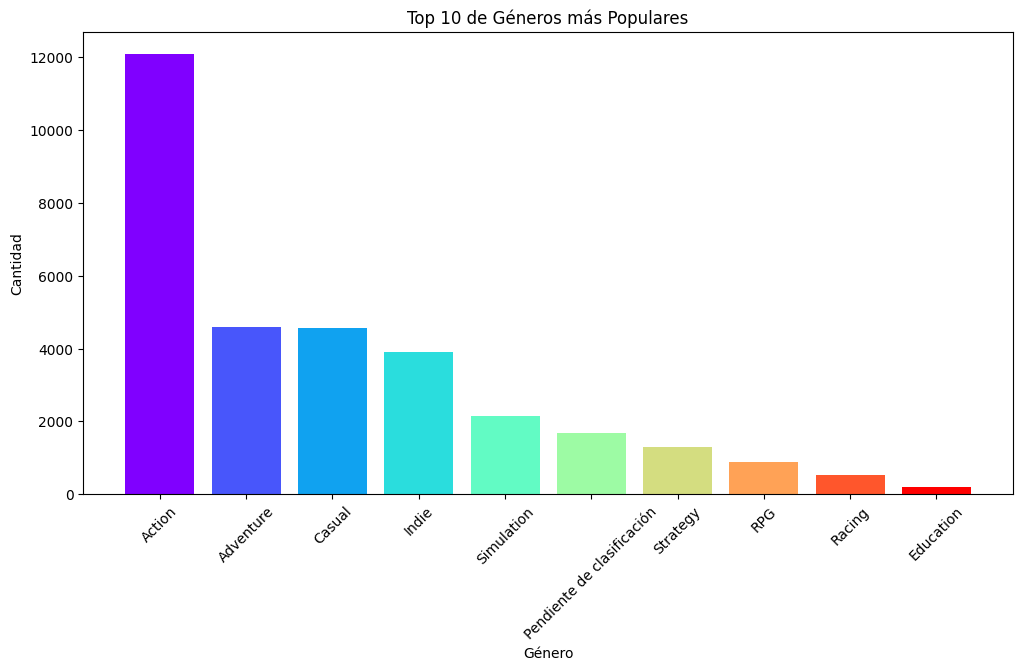

In [37]:
# Top 10 de Géneros más comunes

genre_counts = Counter(df_2['clasificacion'])

most_common_genres = genre_counts.most_common(10)
if most_common_genres:
    genres, counts = zip(*most_common_genres)  # Desempaqueta la lista de tuplas
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(genres)))

    plt.figure(figsize=(12, 6))
    plt.bar(genres, counts, color=colors)
    plt.xticks(rotation=45)

    plt.title('Top 10 de Géneros más Populares')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.show()
else:
    print("No hay géneros comunes para mostrar.")

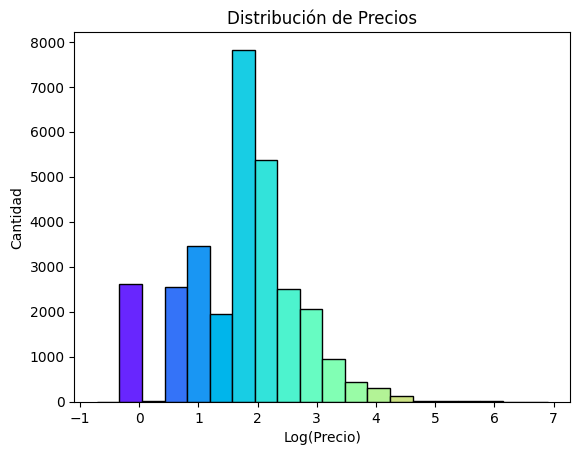

In [38]:
# Distribución de Precios en Escala Logarítmica"

# Filtrar para evitar el logaritmo de cero
filtered_prices = df_2[df_2['price'] > 0]['price']
log_prices = np.log(filtered_prices)

n, bins, patches = plt.hist(log_prices, bins=20, edgecolor='black')

for i, patch in enumerate(patches):
    plt.setp(patch, 'facecolor', plt.cm.rainbow(i / len(patches)))  # Cambia el color de cada barra

plt.title('Distribución de Precios')
plt.xlabel('Log(Precio)')
plt.ylabel('Cantidad')
plt.show()

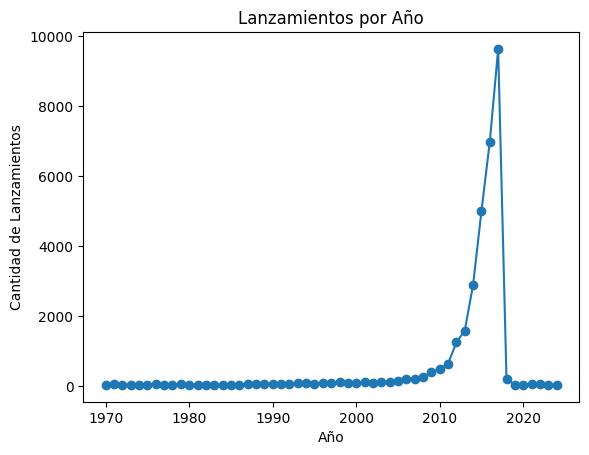

In [39]:
# Lanzamientos de juegos en el tiempo, por cantidad
releases_per_year = df_2.groupby('release_date').size()

plt.plot(releases_per_year.index, releases_per_year.values, marker='o', linestyle='-')
plt.title('Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.show()

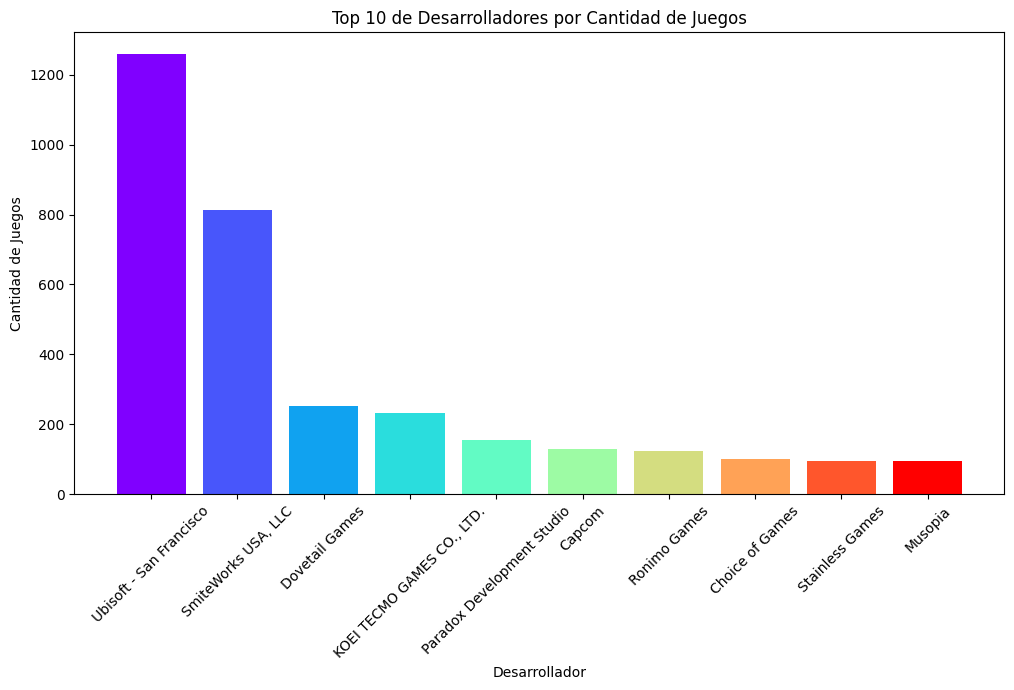

In [40]:
# Gráfica top 10 de Desarrolladores por cantidad

# Filtramos 'No data' antes de contar
developers_filtered = df_2[df_2['developer'] != 'No data']['developer']
developer_counts = Counter(developers_filtered)
most_common_developers = developer_counts.most_common(10)

if most_common_developers:
    developers, counts = zip(*most_common_developers)  # Desempaqueta la lista de tuplas
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(developers)))
    plt.figure(figsize=(12, 6))
    plt.bar(developers, counts, color=colors)
    plt.xticks(rotation=45)

    plt.title('Top 10 de Desarrolladores por Cantidad de Juegos')
    plt.xlabel('Desarrollador')
    plt.ylabel('Cantidad de Juegos')
    plt.show()
else:
    print("No hay desarrolladores comunes para mostrar.")


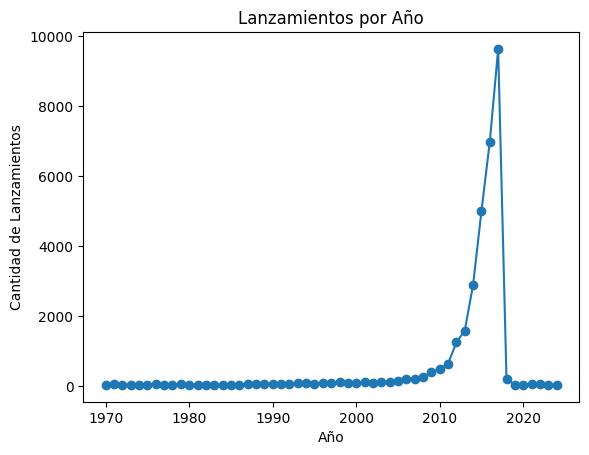

In [41]:
# Asegúrate de que 'release_date' es un año. Si es una fecha completa, deberás extraer el año primero.
releases_per_year = df_2.groupby('release_date').size()

plt.plot(releases_per_year.index, releases_per_year.values, marker='o', linestyle='-')
plt.title('Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.show()

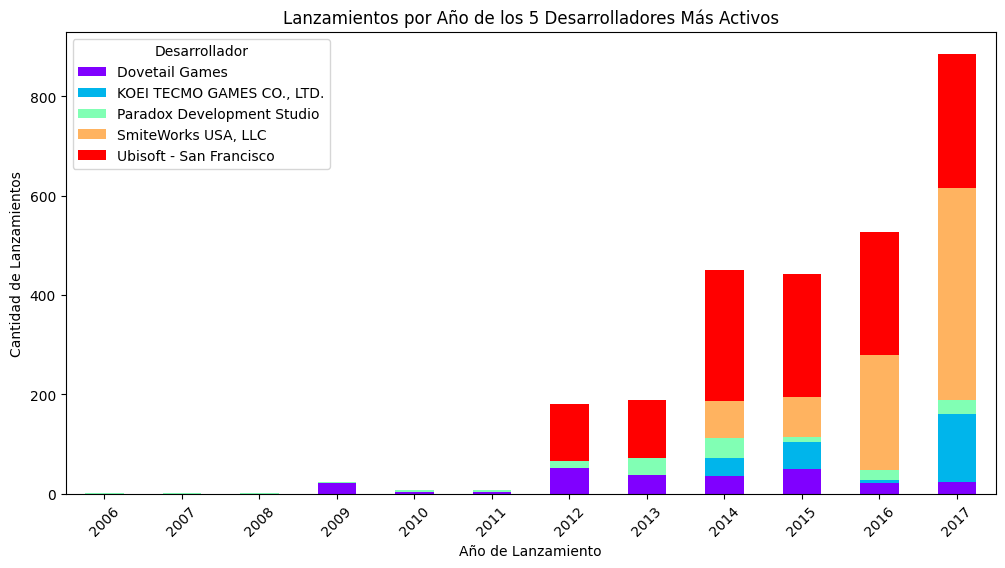

In [42]:
# Contar la frecuencia de cada desarrollador, excluyendo 'No data'
developer_counts = Counter(df_2[df_2['developer'] != 'No data']['developer'])


top_developers = [developer for developer, count in developer_counts.most_common(5)]
top_developer_releases = df_2[df_2['developer'].isin(top_developers)]
releases_per_year_developer = top_developer_releases.groupby(['release_date', 'developer']).size().unstack(fill_value=0)

releases_per_year_developer.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='rainbow')
plt.title('Lanzamientos por Año de los 5 Desarrolladores Más Activos')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Lanzamientos')
plt.xticks(rotation=45)
plt.legend(title='Desarrollador')
plt.show()

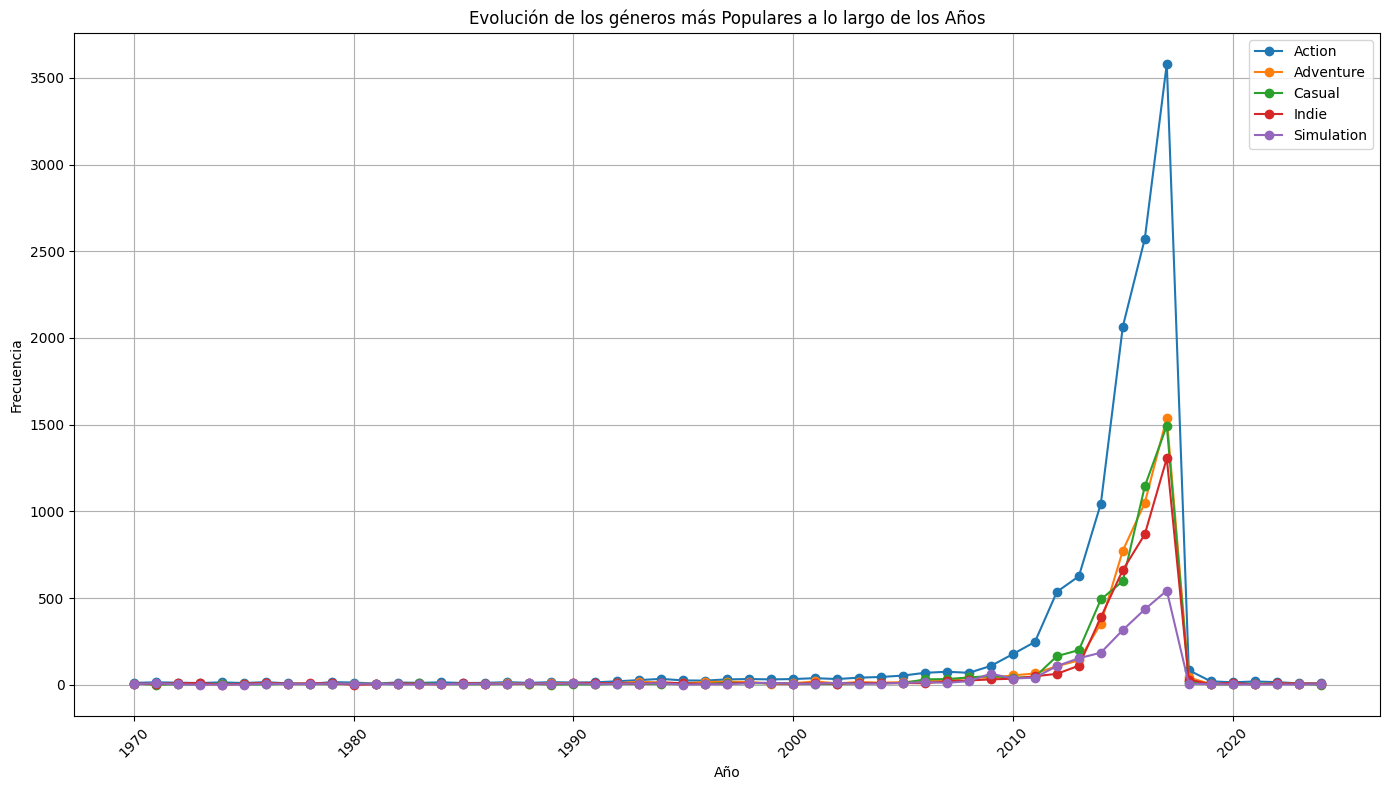

In [43]:
# Gráfica evolución de los generos más populares a lo largo de los años

df_filtered = df_2[df_2['clasificacion'] != 'Pendiente de clasificación'].copy()

df_filtered.loc[:, 'release_date'] = pd.to_numeric(df_filtered['release_date'], errors='coerce').fillna(0).astype(int)
all_genres_count = Counter(df_filtered['clasificacion'])
most_common_genres = [genre for genre, count in all_genres_count.most_common(5)]
genres_over_time = pd.DataFrame(index=sorted(df_filtered['release_date'].unique()))

for genre in most_common_genres:
    # Calcular la frecuencia de cada género por año
    genre_frequency_by_year = df_filtered[df_filtered['clasificacion'] == genre].groupby('release_date').size()
    genres_over_time.loc[:, genre] = genre_frequency_by_year

genres_over_time.fillna(0, inplace=True)

plt.figure(figsize=(14, 8))
for genre in most_common_genres:
    plt.plot(genres_over_time.index, genres_over_time[genre], label=genre, marker='o')

plt.title('Evolución de los géneros más Populares a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis users

In [44]:
items = pd.read_csv('../data/items.csv')
items

,item_id,playtime_forever,user_id,items_count
0,10,6.0,76561197970982479,277
1,20,0.0,76561197970982479,277
2,30,7.0,76561197970982479,277
3,40,0.0,76561197970982479,277
4,50,0.0,76561197970982479,277
...,...,...,...,...
5094087,346330,0.0,76561198329548331,7
5094088,373330,0.0,76561198329548331,7
5094089,388490,3.0,76561198329548331,7
5094090,521570,4.0,76561198329548331,7


In [45]:
# Eliminación de Filas Nulas y Duplicadas
items = items.dropna(how='all')
items = items.drop_duplicates()
items.head()

,item_id,playtime_forever,user_id,items_count
0,10,6.0,76561197970982479,277
1,20,0.0,76561197970982479,277
2,30,7.0,76561197970982479,277
3,40,0.0,76561197970982479,277
4,50,0.0,76561197970982479,277


In [46]:
items = items[items['playtime_forever'] != 0]

In [47]:
df_2.rename(columns={'id': 'item_id'}, inplace=True)

In [48]:
# Calculando el Top 10 de item_id más populares
top_10_items = items['item_id'].value_counts().head(10)

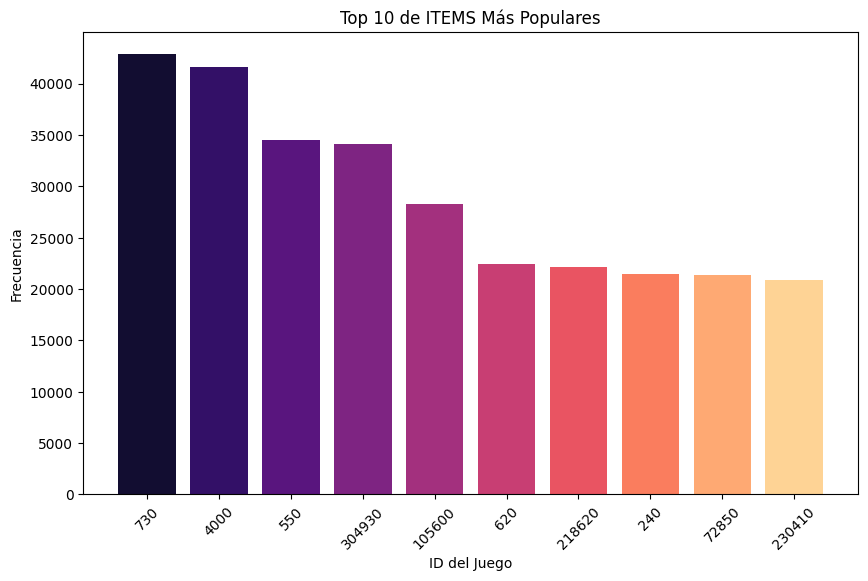

In [49]:
# Generando colores de una paleta de Seaborn
palette_colors = sns.color_palette('magma', n_colors=top_10_items.shape[0])

# Creando el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index.astype(str), top_10_items.values, color=palette_colors)
plt.title('Top 10 de ITEMS Más Populares')
plt.xlabel('ID del Juego')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [50]:
items['playtime_forever'].value_counts()

playtime_forever
1.0        101586
2.0         34391
3.0         31530
4.0         29127
5.0         27612
            ...  
64676.0         1
53328.0         1
44029.0         1
33119.0         1
34753.0         1
Name: count, Length: 48860, dtype: int64

In [51]:
# Convertir minutos a horas
items['playtime_hours'] = items['playtime_forever'] / 60

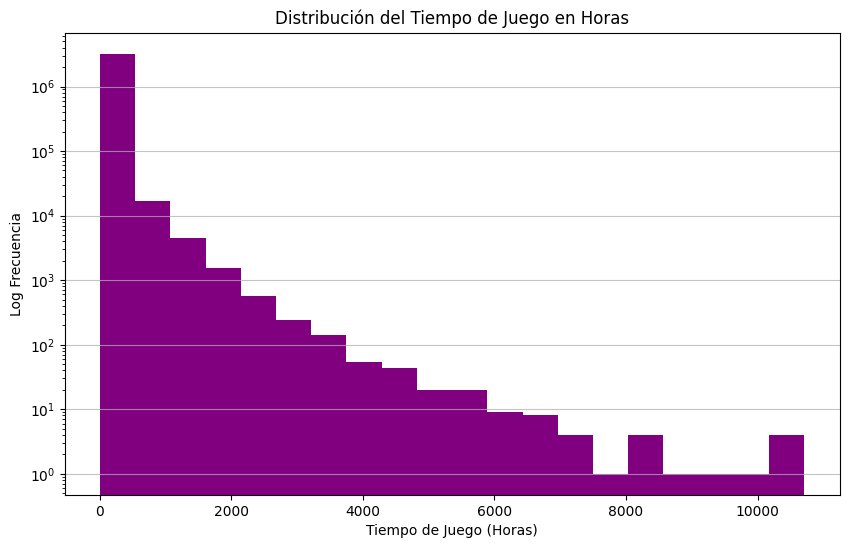

In [52]:
# Definir los bins para el histograma de forma que hagan sentido con el tiempo de juego

max_hours = items['playtime_hours'].max()
bins = np.linspace(0, max_hours, num=21)  # 20 bins hasta el valor máximo

# Histograma de Tiempo de Juego en Horas con escala logarítmica para la frecuencia
plt.figure(figsize=(10, 6))
plt.hist(items['playtime_hours'], bins=bins, color='purple', log=True)
plt.title('Distribución del Tiempo de Juego en Horas')
plt.xlabel('Tiempo de Juego (Horas)')
plt.ylabel('Log Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [53]:
items

,item_id,playtime_forever,user_id,items_count,playtime_hours
0,10,6.0,76561197970982479,277,0.100000
2,30,7.0,76561197970982479,277,0.116667
8,300,4733.0,76561197970982479,277,78.883333
9,240,1853.0,76561197970982479,277,30.883333
10,3830,333.0,76561197970982479,277,5.550000
...,...,...,...,...,...
5094085,304930,677.0,76561198329548331,7,11.283333
5094086,227940,43.0,76561198329548331,7,0.716667
5094089,388490,3.0,76561198329548331,7,0.050000
5094090,521570,4.0,76561198329548331,7,0.066667


In [54]:
items['items_count'].sum()

805136101

In [55]:
total_valores_unicos = items['user_id'].nunique()
print(f"Total de valores únicos en la columna: {total_valores_unicos}")

Total de valores únicos en la columna: 68403


In [56]:
items.drop(columns=['playtime_hours'], inplace=True)

In [57]:
resumen_tipos_de_datos(items)

,Columna,Tipos de Dato,Cantidad de Nulos
0,item_id,[int],0
1,playtime_forever,[float],0
2,user_id,[str],0
3,items_count,[int],0


### Review

In [58]:
reviews = pd.read_csv('../data/review2.csv')
reviews

,posted,item_id,recommend,user_id,sentiment_analysis
0,"Posted November 5, 2011.",1250,True,76561197970982479,2
1,"Posted July 15, 2011.",22200,True,76561197970982479,2
2,"Posted April 21, 2011.",43110,True,76561197970982479,1
3,"Posted June 24, 2014.",251610,True,js41637,2
4,"Posted September 8, 2013.",227300,True,js41637,1
...,...,...,...,...,...
58426,Posted July 10.,70,True,76561198312638244,2
58427,Posted July 8.,362890,True,76561198312638244,2
58428,Posted July 3.,273110,True,LydiaMorley,1
58429,Posted July 20.,730,True,LydiaMorley,2


In [59]:
resumen_tipos_de_datos(reviews)

,Columna,Tipos de Dato,Cantidad de Nulos
0,posted,[str],0
1,item_id,[int],0
2,recommend,[bool],0
3,user_id,[str],0
4,sentiment_analysis,[int],0


In [60]:
# Eliminar 'Posted ' y el punto final de la columna 'posted'
reviews['posted'] = reviews['posted'].str.replace('Posted ', '').str.rstrip('.')

In [61]:
reviews

,posted,item_id,recommend,user_id,sentiment_analysis
0,"November 5, 2011",1250,True,76561197970982479,2
1,"July 15, 2011",22200,True,76561197970982479,2
2,"April 21, 2011",43110,True,76561197970982479,1
3,"June 24, 2014",251610,True,js41637,2
4,"September 8, 2013",227300,True,js41637,1
...,...,...,...,...,...
58426,July 10,70,True,76561198312638244,2
58427,July 8,362890,True,76561198312638244,2
58428,July 3,273110,True,LydiaMorley,1
58429,July 20,730,True,LydiaMorley,2


In [62]:
# Supongamos que tu DataFrame se llama df_reviews y la columna con las fechas es 'posted'
def convertir_fecha(x, year_min, year_max):
    try:
        return datetime.strptime(x, '%B %d, %Y')
    except ValueError:
        try:
            # Intenta extraer el día y el mes
            fecha_sin_ano = datetime.strptime(x, '%B %d')
            # Asigna un año aleatorio en el rango especificado
            return fecha_sin_ano.replace(year=random.randint(year_min, year_max))
        except ValueError:
            return pd.NaT

# Extraer el año mínimo y máximo de la columna 'posted'
year_min = reviews['posted'].apply(lambda x: pd.to_datetime(x, errors='coerce').year).min()
year_max = reviews['posted'].apply(lambda x: pd.to_datetime(x, errors='coerce').year).max()

# Aplicar la conversión de fechas utilizando los años mínimo y máximo
reviews['fecha_convertida'] = reviews['posted'].apply(lambda x: convertir_fecha(x, year_min, year_max))

In [63]:
reviews

,posted,item_id,recommend,user_id,sentiment_analysis,fecha_convertida
0,"November 5, 2011",1250,True,76561197970982479,2,2011-11-05
1,"July 15, 2011",22200,True,76561197970982479,2,2011-07-15
2,"April 21, 2011",43110,True,76561197970982479,1,2011-04-21
3,"June 24, 2014",251610,True,js41637,2,2014-06-24
4,"September 8, 2013",227300,True,js41637,1,2013-09-08
...,...,...,...,...,...,...
58426,July 10,70,True,76561198312638244,2,2011-07-10
58427,July 8,362890,True,76561198312638244,2,2012-07-08
58428,July 3,273110,True,LydiaMorley,1,2012-07-03
58429,July 20,730,True,LydiaMorley,2,2010-07-20


In [64]:
# Eliminar la columna
reviews.drop(columns=['posted'], inplace=True)

# Cambiar el nombre de la columna
reviews.rename(columns={'fecha_convertida': 'posted'}, inplace=True)
reviews.head()

,item_id,recommend,user_id,sentiment_analysis,posted
0,1250,True,76561197970982479,2,2011-11-05
1,22200,True,76561197970982479,2,2011-07-15
2,43110,True,76561197970982479,1,2011-04-21
3,251610,True,js41637,2,2014-06-24
4,227300,True,js41637,1,2013-09-08


In [65]:
resumen_tipos_de_datos(reviews)

,Columna,Tipos de Dato,Cantidad de Nulos
0,item_id,[int],0
1,recommend,[bool],0
2,user_id,[str],0
3,sentiment_analysis,[int],0
4,posted,"[Timestamp, NaTType]",25


In [66]:
reviews.dropna(inplace=True)
resumen_tipos_de_datos(reviews)

,Columna,Tipos de Dato,Cantidad de Nulos
0,item_id,[int],0
1,recommend,[bool],0
2,user_id,[str],0
3,sentiment_analysis,[int],0
4,posted,[Timestamp],0


In [67]:
# Eliminación de Filas Nulas y Duplicadas
reviews = reviews.dropna(how='all')
reviews = reviews.drop_duplicates()
reviews.head()

,item_id,recommend,user_id,sentiment_analysis,posted
0,1250,True,76561197970982479,2,2011-11-05
1,22200,True,76561197970982479,2,2011-07-15
2,43110,True,76561197970982479,1,2011-04-21
3,251610,True,js41637,2,2014-06-24
4,227300,True,js41637,1,2013-09-08


In [68]:
print(f"Cantidad de usuarios que opinaron: {len(reviews['user_id'].unique())}")

Cantidad de usuarios que opinaron: 25449


In [69]:
df_filtered = reviews[reviews['posted'] != 2024]
df_counts = df_filtered.groupby("posted").count()

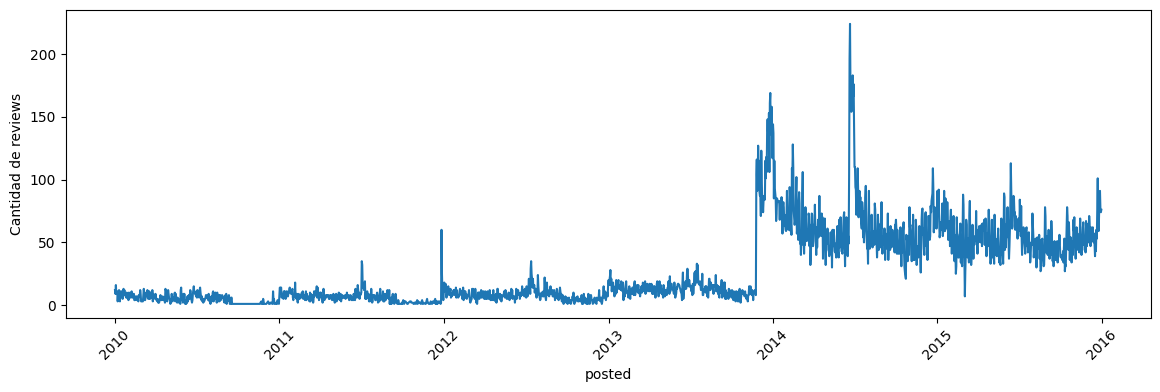

In [70]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted", y="sentiment_analysis")
plt.ylabel('Cantidad de reviews')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = reviews.groupby(['sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          2468    4.225593
                   True           5498    9.413416
1                  False          3174    5.434373
                   True          21389   36.621238
2                  False          1092    1.869671
                   True          24785   42.435709

In [72]:
# Calcular la frecuencia de cada valor en la columna Sentiment_analysis
sentiment_counts = reviews['sentiment_analysis'].value_counts()

C:\Users\rama0\AppData\Local\Temp\ipykernel_12852\789829497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='mako')


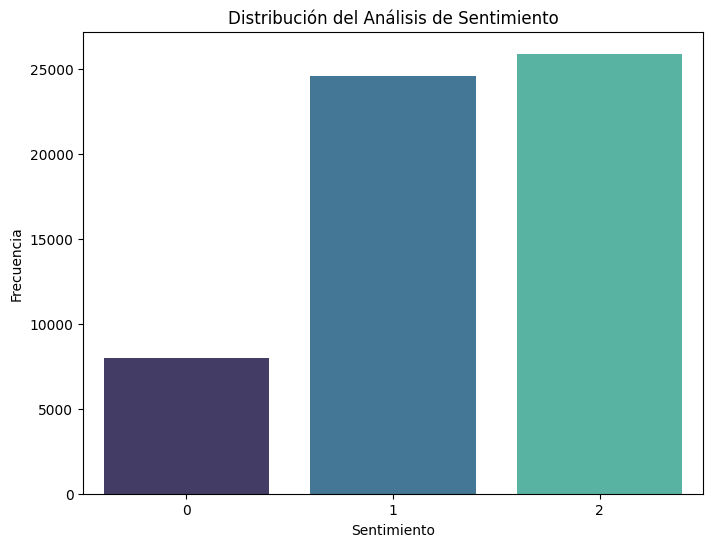

In [73]:
# Crear un gráfico de barras con paleta de colores
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='mako')
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()

In [74]:
resumen_tipos_de_datos(reviews)

,Columna,Tipos de Dato,Cantidad de Nulos
0,item_id,[int],0
1,recommend,[bool],0
2,user_id,[str],0
3,sentiment_analysis,[int],0
4,posted,[Timestamp],0


In [75]:
df_merge = pd.merge(items, reviews, how="left")
df_merge = pd.merge(df_2, df_merge, how="left")
df_merge = df_merge.dropna()
df_merge

,app_name,release_date,price,item_id,developer,clasificacion,playtime_forever,user_id,items_count,recommend,sentiment_analysis,posted
78,Carmageddon Max Pack,1997,9.99,282010,Stainless Games Ltd,Action,466.0,InstigatorAU,112.0,True,1.0,2013-01-12
144,Half-Life,1998,9.99,70,Valve,Action,1395.0,EizanAratoFujimaki,391.0,True,1.0,2015-10-28
160,Half-Life,1998,9.99,70,Valve,Action,590.0,GamerFag,64.0,True,1.0,2011-01-27
179,Half-Life,1998,9.99,70,Valve,Action,5599.0,76561198020928326,110.0,True,1.0,2014-07-01
193,Half-Life,1998,9.99,70,Valve,Action,64.0,Bluegills,1280.0,True,2.0,2013-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...
2856394,Counter-Strike: Condition Zero,2004,9.99,80,Valve,Action,2416.0,76561198015050660,156.0,False,1.0,2014-12-23
2856723,Counter-Strike: Condition Zero,2004,9.99,80,Valve,Action,15.0,76561198023508728,89.0,False,1.0,2014-10-26
2856997,Counter-Strike: Condition Zero,2004,9.99,80,Valve,Action,442.0,green290,36.0,True,2.0,2015-01-05
2857518,Counter-Strike: Condition Zero,2004,9.99,80,Valve,Action,72.0,174gamecuman700kngkakak,159.0,True,1.0,2014-10-31


In [76]:
resumen_tipos_de_datos(df_merge)

,Columna,Tipos de Dato,Cantidad de Nulos
0,app_name,[str],0
1,release_date,[int],0
2,price,[float],0
3,item_id,[int],0
4,developer,[str],0
5,clasificacion,[str],0
6,playtime_forever,[float],0
7,user_id,[str],0
8,items_count,[float],0
9,recommend,[bool],0


In [77]:
# Archivo final
df_merge.to_csv('../data/fusionada.csv', index=False)